In [2]:
"""
It consists of scraping the following information from IMDB adventures movies:

Movie name
Description
Release Date
Director Name
Rating
Duration
Genre
Stars (Actors)
Filming Dates
"""

'\nIt consists of scraping the following information from IMDB adventures movies:\n\nMovie name\nDescription\nRelease Date\nDirector Name\nRating\nDuration\nGenre\nStars (Actors)\nFilming Dates\n'

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# requests used to get the URL
#path = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=51&ref_=adv_nxt"

# the above is normal url, but we want from 1 to 100 movies, so we want to change the number (start = 100)
path = f'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=1&ref_=adv_nxt'
data = requests.get(path)
print(data)

<Response [200]>


In [5]:
soup = BeautifulSoup(data.content, "html.parser")



regular expression
regex
to use str.extract, I need a pd.Series
str.extract works only with pd.Series objects



output of str.extract -> dataframe(rows and columns)

In [6]:
description_container = soup.select('.text-muted+ .text-muted , .ratings-bar+ .text-muted')
descrip = []

for tag in description_container:
    descrip.append(tag.text.replace('\n', ''))



In [7]:
big_container = soup.select('.lister-item-content')
dur = []
for tag in big_container:
    dur.append( pd.Series(tag.text).str.extract(r'(\d+) min').squeeze())
    # print('='*100)



# dur

In [8]:
rate = []
for tag in big_container:
    # print(tag.text.replace('\n', ''))
    print(   pd.Series(tag.text.replace('\n', '')).str.extract(r'(\d+\.\d)Rate this').squeeze()  )
    print('='*100)


6.8
7.1
8.6
6.3
6.7
7.2
8.1
7.5
6.4
7.2
7.5
7.3
7.2
5.4
8.4
7.7
8.1
8.7
6.6
7.5
8.8
6.0
7.6
6.5
8.9
8.1
7.4
8.3
7.4
8.5
6.7
6.7
6.3
8.4
8.0
7.3
7.8
7.2
8.2
5.8
7.7
6.6
7.3
6.5
8.6
7.0
8.1
7.9
7.3
7.4


pattern for extracting rating. \d+.\dRate this

# Title
## smal header
#### header
normal test
* bulltet1
* bulltet 2

this a normale...I want to put this **bold**...this is ***italic***
this is the link to [imdb](https://www.imdb.com/search/title/?title_type=feature&genres=adventure&explore=genres&ref_=adv_prv)

$ x^2$


In [9]:
# extract movie name

movie_name = []
imdb_movie_name = soup.find_all('h3', class_ ='lister-item-header')  
for movie in imdb_movie_name:
    movie_name.append(movie.a.text)     # a used to remove the numbers
#print(movie_name)

len(movie_name)

50

In [10]:
# extract movie runtime

movie_runtime = []
imdb_movie_runtime = soup.find_all('span', class_ ='runtime')           
for runtime in imdb_movie_runtime:
  movie_runtime.append(runtime.text)
print(movie_runtime[:5])

len(movie_runtime)

['106 min', '100 min', '148 min', '131 min', '116 min']


50

In [11]:
# extract movie genre

movie_genre = []
imdb_movie_genre = soup.find_all('span', class_ ='genre')           
for genre in imdb_movie_genre:
  movie_genre.append(genre.text.replace("\n", "").strip())
#print(movie_genre)

len(movie_genre)

50

In [12]:
# extract movie rating

movie_rating = []
imdb_movie_rating = soup.find_all('div', class_ ='inline-block ratings-imdb-rating')           
for rating in imdb_movie_rating:
  rating1 = float(rating.text.replace("\n", ""))
  movie_rating.append(rating1)
print(movie_rating)

len(movie_rating)

[6.8, 7.1, 8.6, 6.3, 6.7, 7.2, 8.1, 7.5, 6.4, 7.2, 7.5, 7.3, 7.2, 5.4, 8.4, 7.7, 8.1, 8.7, 6.6, 7.5, 8.8, 6.0, 7.6, 6.5, 8.9, 8.1, 7.4, 8.3, 7.4, 8.5, 6.7, 6.7, 6.3, 8.4, 8.0, 7.3, 7.8, 7.2, 8.2, 5.8, 7.7, 6.6, 7.3, 6.5, 8.6, 7.0, 8.1, 7.9, 7.3, 7.4]


50

In [13]:
# extract movie description
movie_desc = []

# 'div' is the mother for the 'p'
# we want to take mother because we are having two 'p' child
# so only we are using [1] that means second element
# to take the second child 'p'

imdb_movie_desc = soup.find_all('div', class_ ='lister-item-content')  

for description in imdb_movie_desc:
  p_tags = description.find_all('p', class_='text-muted')
  desc = p_tags[1].text
  movie_desc.append(desc.replace('\n', ""))

print(movie_desc[:2])

len(movie_desc)

['"After accidentally crash-landing in 2022, time-traveling fighter pilot Adam Reed teams up with his 12-year-old self for a mission to save the future.', 'A 13-year-old girl named Meilin turns into a giant red panda whenever she gets too excited.']


50

In [14]:
# extract release year

movie_year = []
imdb_movie_year = soup.find_all('span', class_ ='lister-item-year')           
for release_year in imdb_movie_year:
  year = int(release_year.text.replace("(", "").replace(")", "").replace("I", ""))
  movie_year.append(year)
print(movie_year)

len(movie_year)

[2022, 2022, 2021, 2021, 2022, 2021, 2021, 2021, 2021, 2021, 1989, 2021, 2021, 1995, 2019, 2014, 2021, 2014, 2021, 2021, 2010, 2021, 2001, 2016, 2001, 2015, 2017, 2009, 2002, 2018, 2017, 2021, 1984, 2018, 2016, 1997, 2012, 2012, 1993, 2012, 2018, 2012, 2016, 2018, 1977, 1996, 2014, 2009, 2004, 2021]


50

In [15]:
# extract movie director

movie_dir = []
imdb_movie_dir = soup.find_all('p', class_ ='')  

# [0] is first index or first element 1
# [1] is second index or second element 2
# to extract the director name from the actor we are using this method
         
for director in imdb_movie_dir:
  
  #movie_dir.append(director.text.replace("\n", "").split('|'))
#print(movie_dir[:5])
  #movie_dir.append(director.text.replace("\n", "").split('|')[0])
#print(movie_dir[:5])
   #movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':'))
#print(movie_dir[:5])
    movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':')[1])
print(movie_dir[:5])


len(movie_dir)

['Shawn Levy', 'Domee Shi', 'Jon Watts', 'Matthew Vaughn', 'Ruben Fleischer']


50

In [16]:
# extract actor

movie_actor = []
imdb_movie_actor = soup.find_all('p', class_ ='') 

# we want stars, so we remove others
for actor in imdb_movie_actor:
  movie_actor.append(actor.text.replace('\n', "").split('Stars:')[1])
print(movie_actor[:3])

len(movie_actor)

['Ryan Reynolds, Walker Scobell, Mark Ruffalo, Jennifer Garner', 'Rosalie Chiang, Sandra Oh, Ava Morse, Hyein Park', 'Tom Holland, Zendaya, Benedict Cumberbatch, Jacob Batalon']


50

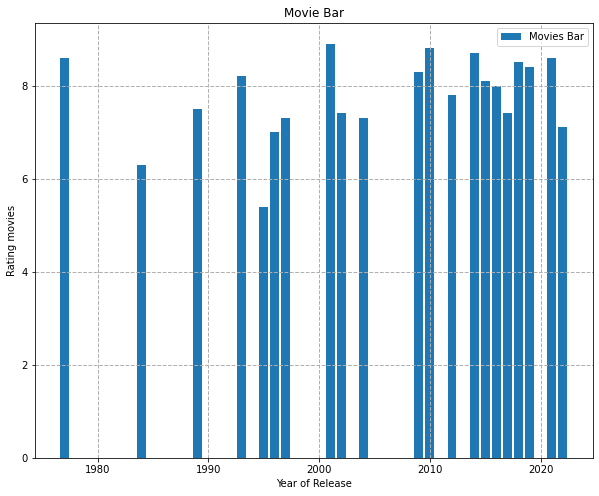

In [18]:
# visualizations

plt.figure(figsize=(10, 8))
plt.bar(movie_year, movie_rating, label = 'Movies Bar')
plt.xlabel('Year of Release')
plt.ylabel('Rating movies')
plt.title('Movie Bar')
plt.legend()
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()


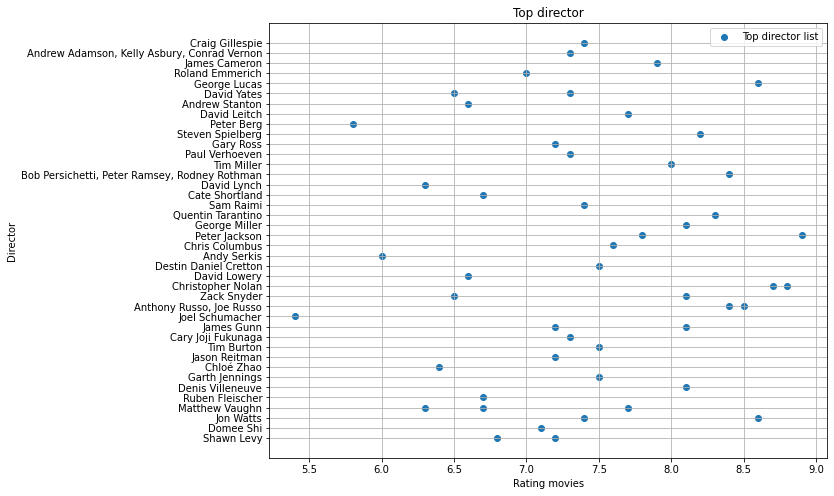

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(movie_rating, movie_dir, label = 'Top director list')
plt.xlabel('Rating movies')
plt.ylabel('Director')
plt.title('Top director')
plt.legend()
plt.grid(True)
plt.show()


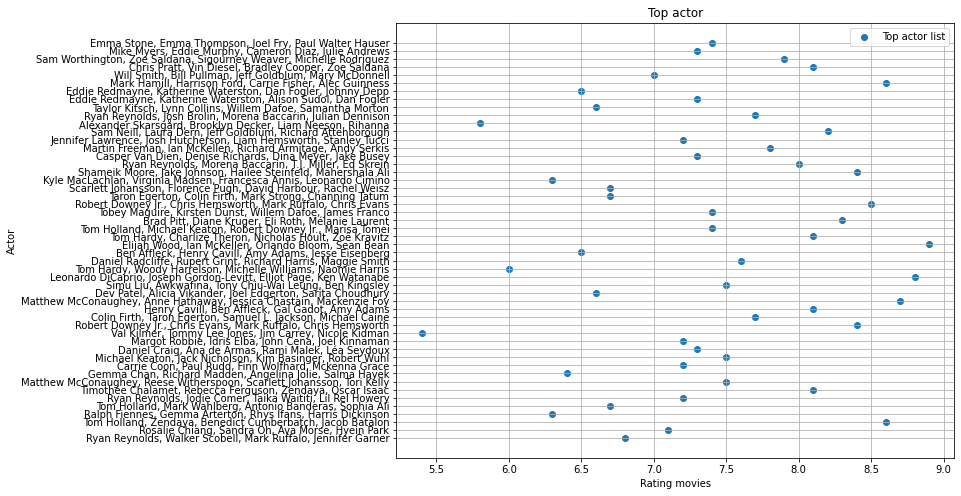

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(movie_rating, movie_actor, label = 'Top actor list')
plt.xlabel('Rating movies')
plt.ylabel('Actor')
plt.title('Top actor')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# converted movie duration into int

converted_duration = []
for i in movie_runtime:
    duration = int(i.replace('min', ""))
    converted_duration.append(duration)
print(converted_duration)

[106, 100, 148, 131, 116, 115, 155, 110, 156, 124, 126, 163, 132, 121, 181, 129, 242, 169, 130, 132, 148, 97, 152, 152, 178, 120, 133, 153, 121, 149, 141, 134, 137, 117, 108, 129, 169, 142, 127, 131, 119, 132, 132, 134, 121, 145, 121, 162, 93, 134]


In [22]:
# normalized value

df = pd.DataFrame({
               'Rating': movie_rating,
               'Duration': converted_duration
              })
normalized_df = (df - df.min()) / (df.max() - df.min())
print(normalized_df)


      Rating  Duration
0   0.400000  0.087248
1   0.485714  0.046980
2   0.914286  0.369128
3   0.257143  0.255034
4   0.371429  0.154362
5   0.514286  0.147651
6   0.771429  0.416107
7   0.600000  0.114094
8   0.285714  0.422819
9   0.514286  0.208054
10  0.600000  0.221477
11  0.542857  0.469799
12  0.514286  0.261745
13  0.000000  0.187919
14  0.857143  0.590604
15  0.657143  0.241611
16  0.771429  1.000000
17  0.942857  0.510067
18  0.342857  0.248322
19  0.600000  0.261745
20  0.971429  0.369128
21  0.171429  0.026846
22  0.628571  0.395973
23  0.314286  0.395973
24  1.000000  0.570470
25  0.771429  0.181208
26  0.571429  0.268456
27  0.828571  0.402685
28  0.571429  0.187919
29  0.885714  0.375839
30  0.371429  0.322148
31  0.371429  0.275168
32  0.257143  0.295302
33  0.857143  0.161074
34  0.742857  0.100671
35  0.542857  0.241611
36  0.685714  0.510067
37  0.514286  0.328859
38  0.800000  0.228188
39  0.114286  0.255034
40  0.657143  0.174497
41  0.342857  0.261745
42  0.54285

In [23]:
# join scraped data into a dataframe

imdb_movie = pd.DataFrame({ 'Movie Name' : movie_name,
               'Yaer of Release': movie_year,
                'Duration': movie_runtime,
                'Genre': movie_genre,
                'Rating': movie_rating,
                'Actor': movie_actor,
                'Director': movie_dir,
                'Description': movie_desc
                 })

imdb_movie

,Movie Name,Yaer of Release,Duration,Genre,Rating,Actor,Director,Description
0,The Adam Project,2022,106 min,"Action, Adventure, Comedy",6.8,"Ryan Reynolds, Walker Scobell, Mark Ruffalo, J...",Shawn Levy,"""After accidentally crash-landing in 2022, tim..."
1,Rot,2022,100 min,"Animation, Adventure, Comedy",7.1,"Rosalie Chiang, Sandra Oh, Ava Morse, Hyein Park",Domee Shi,A 13-year-old girl named Meilin turns into a g...
2,Spider-Man: No Way Home,2021,148 min,"Action, Adventure, Fantasy",8.6,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",Jon Watts,"With Spider-Man's identity now revealed, Peter..."
3,The King's Man,2021,131 min,"Action, Adventure, Thriller",6.3,"Ralph Fiennes, Gemma Arterton, Rhys Ifans, Har...",Matthew Vaughn,"In the early years of the 20th century, the Ki..."
4,Uncharted,2022,116 min,"Action, Adventure",6.7,"Tom Holland, Mark Wahlberg, Antonio Banderas, ...",Ruben Fleischer,Street-smart Nathan Drake is recruited by seas...
5,Free Guy,2021,115 min,"Action, Adventure, Comedy",7.2,"Ryan Reynolds, Jodie Comer, Taika Waititi, Lil...",Shawn Levy,A bank teller discovers that he's actually an ...
6,Dune,2021,155 min,"Action, Adventure, Drama",8.1,"Timothée Chalamet, Rebecca Ferguson, Zendaya, ...",Denis Villeneuve,Feature adaptation of Frank Herbert's science ...
7,Sing - Die Show deines Lebens,2021,110 min,"Animation, Adventure, Comedy",7.5,"Matthew McConaughey, Reese Witherspoon, Scarle...",Garth Jennings,Buster Moon and his friends must persuade recl...
8,Eternals,2021,156 min,"Action, Adventure, Fantasy",6.4,"Gemma Chan, Richard Madden, Angelina Jolie, Sa...",Chloé Zhao,"The saga of the Eternals, a race of immortal b..."
9,Ghostbusters: Legacy,2021,124 min,"Adventure, Comedy, Fantasy",7.2,"Carrie Coon, Paul Rudd, Finn Wolfhard, Mckenna...",Jason Reitman,When a single mom and her two kids arrive in a...
